In [1]:
import yfinance as yf
# To use stock data of any company
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
stock_data = yf.download('AAPL', start = '2024-01-01') 
#AAPL is a ticker symbol of aapl company to download any company stock data
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,183.903244,186.677052,182.169616,185.399112,82488700
2024-01-03,182.526260,184.141016,181.713925,182.496542,58414500
2024-01-04,180.208115,181.377068,179.187752,180.445860,71983600
2024-01-05,179.484924,181.050144,178.484379,180.287359,62379700
2024-01-08,183.823990,183.863624,179.801976,180.386452,59144500
2024-01-09,183.407898,183.417799,181.020441,182.199311,42841800
2024-01-10,184.448074,184.656101,182.199307,182.625292,46792900
2024-01-11,183.853683,185.300031,181.902113,184.794793,49128400


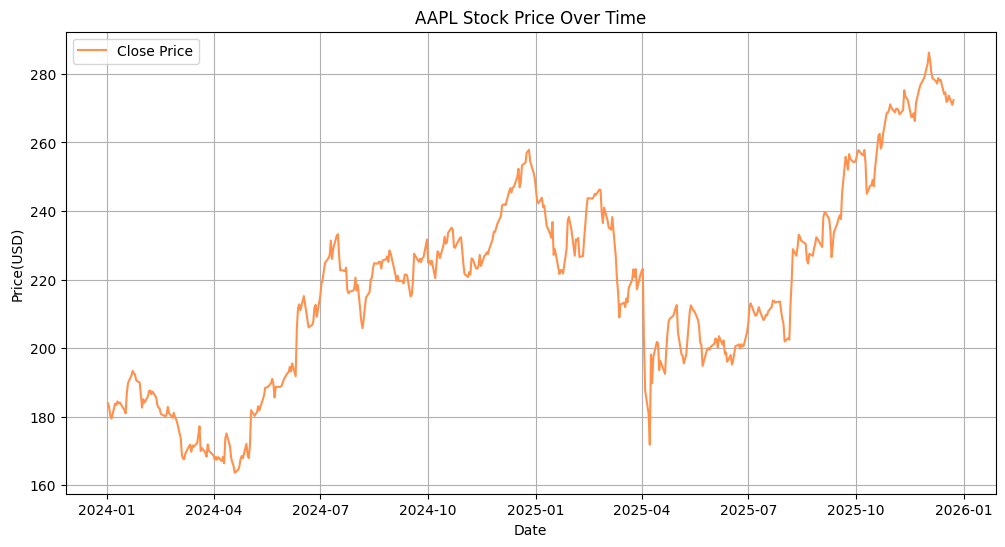

In [3]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period=30)# 30Days
#We are using additive Decomposition because above graph shows additive increase in the graph

In [5]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

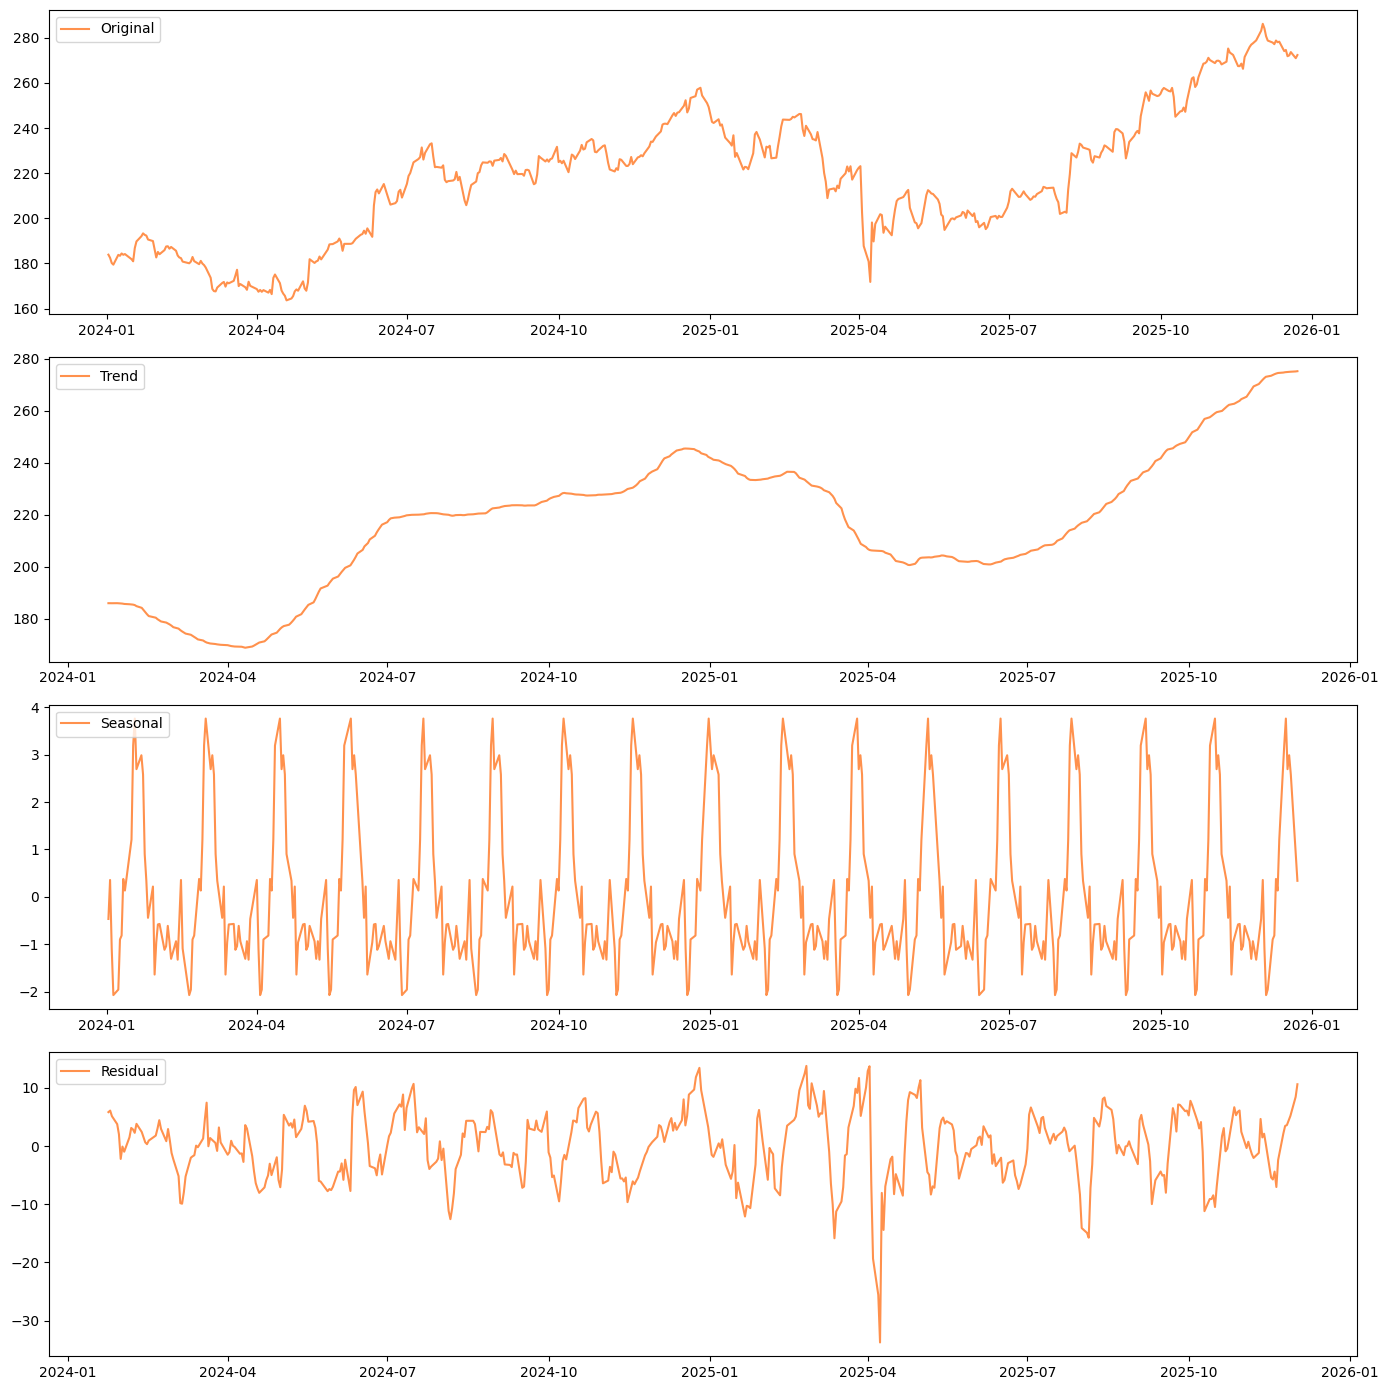

In [6]:
plt.figure(figsize= (14,14))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

In [7]:
from statsmodels.tsa.seasonal import STL

In [8]:
stl = STL(stock_data['Close'], period=30)
result = stl.fit()
# Perform STL Decomposition

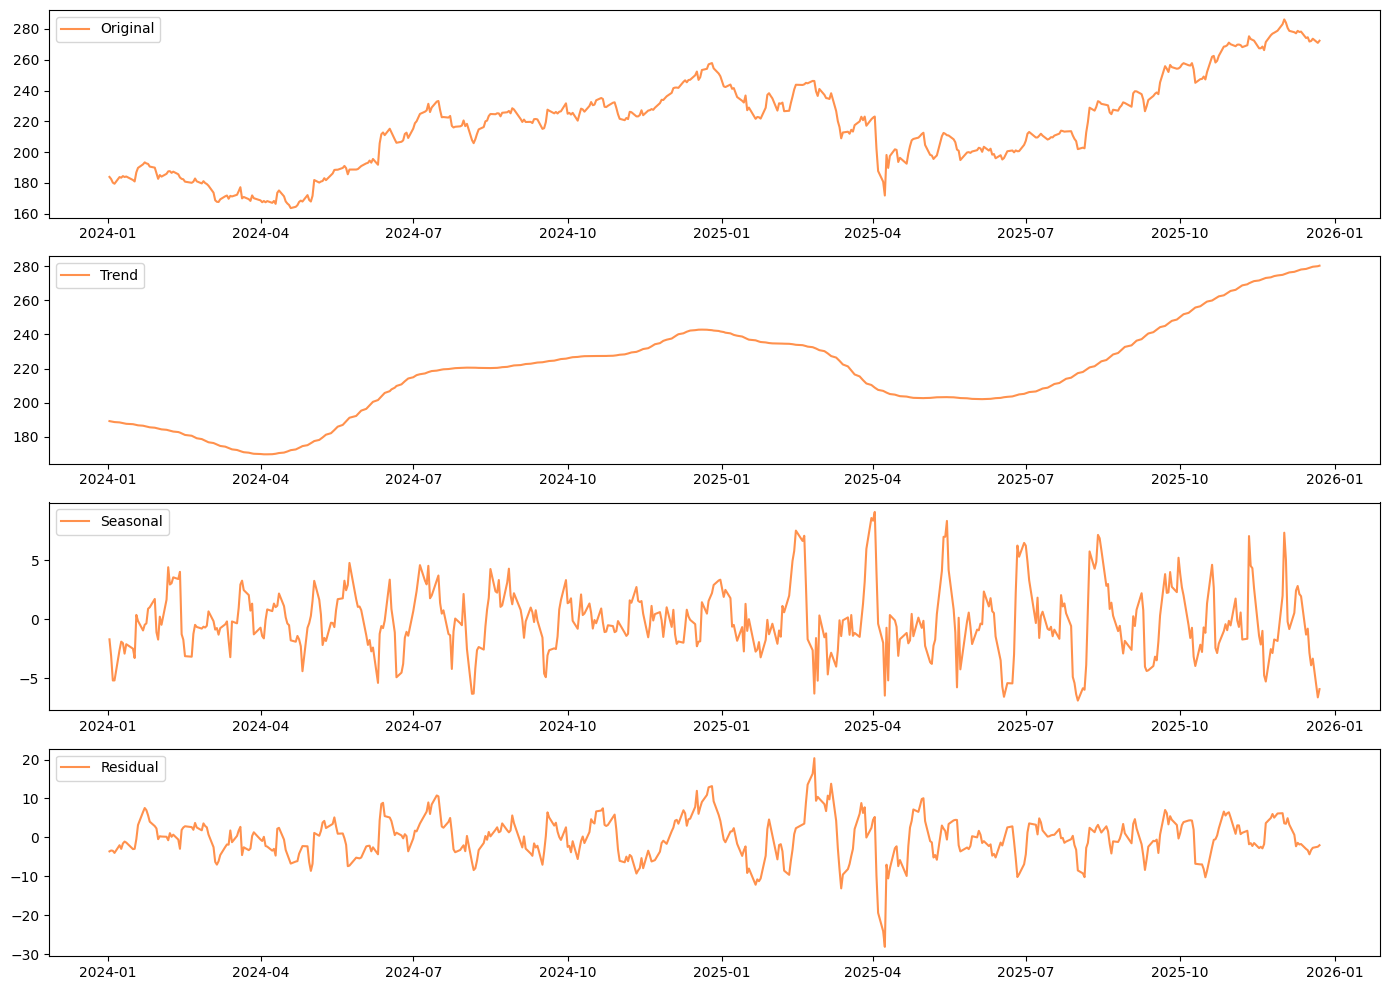

In [9]:
# Plot the Decomposition Components
plt.figure(figsize= (14,10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color='#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Stationarity Test

To Check Weak Stationarity - WE PERFORM TWO TEST
1. ADF TEST(Augmented Dickey-Fuller Test) 
2. KPSS TEST

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adf_test = adfuller(stock_data['Close'])

In [12]:
print('ADF Test Results:')
print(f'ADF Statistics: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f' {key}: {round(value,3)}')

ADF Test Results:
ADF Statistics: -1.211
p-value: 0.669
Critical Values:
 1%: -3.444
 5%: -2.867
 10%: -2.57


In [13]:
from statsmodels.tsa.stattools import kpss

In [14]:
kpss_test = kpss(stock_data['Close'], regression='ct')
# 'c' for constant(level stationarity), 'ct' for trend

C:\Users\kirti\AppData\Local\Temp\ipykernel_15704\1271862306.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct')


In [15]:
print('KPSS Test Results:')
print(f'KPSS Statistics: {round(kpss_test[0],2)}')
print(f'p-value: {round(kpss_test[1])}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f' {key}: {round(value,3)}')

KPSS Test Results:
KPSS Statistics: 0.35
p-value: 0
Critical Values:
 10%: 0.119
 5%: 0.146
 2.5%: 0.176
 1%: 0.216


In [16]:
import numpy as np
from scipy.stats import ks_2samp

In [17]:
np.random.seed(0) #Fix the randomness so results don’t change
n = 500 #I want 500 items/data points

In [18]:
#np.random.normal(mean, std, size)
#Mean (μ) = 0
#Standard deviation (σ) = 1
#n = 500 (from earlier)
strict_stationary_series = np.random.normal(0, 1, n)
#Strict stationarity means the entire distribution stays the same over time.
non_strict_stationary_series = np.concatenate([
    np.random.normal(0 , 1, n//2),
    np.random.normal(0, 2, n//2)
])
#non-strict stationary:
#The variance changes over time

In [19]:
# Function to split the series into two halves and perform the K-s Test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

In [20]:
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

In [21]:
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

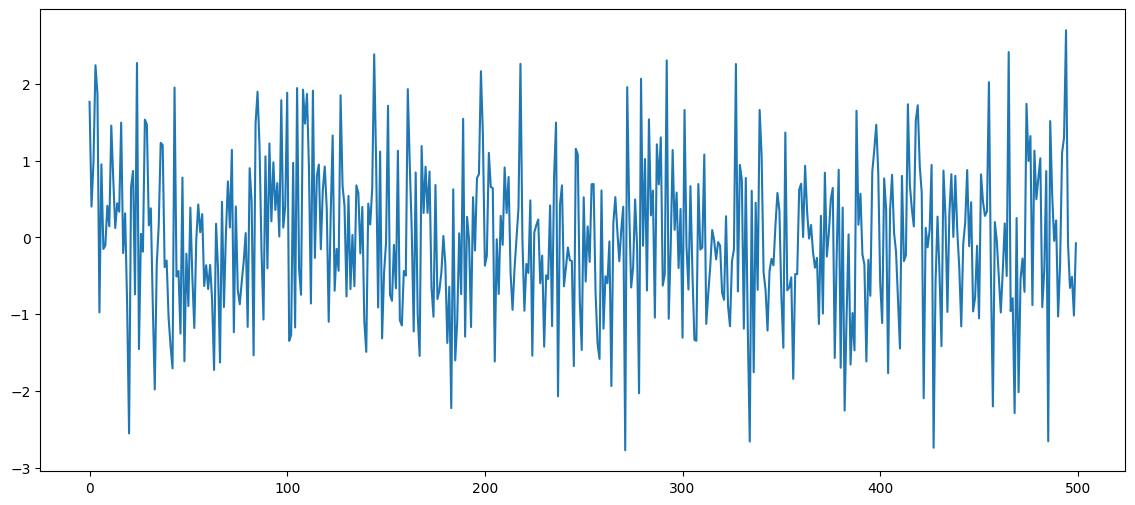

In [22]:
plt.figure(figsize = (14, 6))
plt.plot(strict_stationary_series)

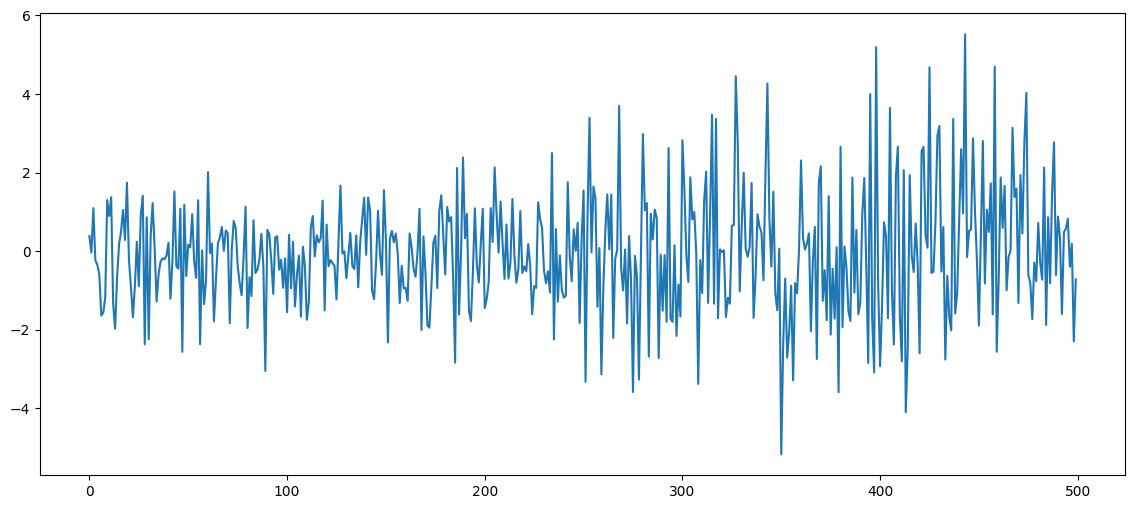

In [23]:
plt.figure(figsize = (14, 6))
plt.plot(non_strict_stationary_series)

# Making Data Stationary

1. DIFFERENCING
2. TRANSFORMATION
3. DE-TRENDING

In [24]:
# Defing ADF and KPSS Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
        
def kpss_test(series):
    result = kpss(series, regression = 'c')
    print('KPSS Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

In [25]:
prices = stock_data['Close']

In [26]:
adf_test(prices)

ADF Statistics: -1.2113717604214793
p-value: 0.6686848371121983
Critical Value (1%): -3.444
Critical Value (5%): -2.867
Critical Value (10%): -2.570


In [27]:
prices

Ticker,AAPL
Date,
2024-01-02,183.903244
2024-01-03,182.526260
2024-01-04,180.208115
2024-01-05,179.484924
2024-01-08,183.823990
...,...
2025-12-17,271.839996
2025-12-18,272.190002
2025-12-19,273.670013


In [28]:
prices.diff() #First order Differencing

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.376984
2024-01-04,-2.318146
2024-01-05,-0.723190
2024-01-08,4.339066
...,...
2025-12-17,-2.769989
2025-12-18,0.350006
2025-12-19,1.480011


In [29]:
prices.diff().diff() #Second Order Differencing

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.941162
2024-01-05,1.594955
2024-01-08,5.062256
...,...
2025-12-17,-3.269989
2025-12-18,3.119995
2025-12-19,1.130005


In [30]:
import numpy as np
from scipy import stats

#Log Transformation
prices_log = np.log(prices)

#Square root Transformation
prices_sqrt = np.sqrt(prices)


In [31]:
prices_log

Ticker,AAPL
Date,
2024-01-02,5.214410
2024-01-03,5.206894
2024-01-04,5.194112
2024-01-05,5.190091
2024-01-08,5.213979
...,...
2025-12-17,5.605214
2025-12-18,5.606500
2025-12-19,5.611923


In [32]:
prices_sqrt

Ticker,AAPL
Date,
2024-01-02,13.561093
2024-01-03,13.510228
2024-01-04,13.424162
2024-01-05,13.397198
2024-01-08,13.558171
...,...
2025-12-17,16.487571
2025-12-18,16.498182
2025-12-19,16.542975


In [33]:
type(prices)
prices.shape

(497, 1)

In [34]:
prices = prices.squeeze()      # make 1D
prices = prices[prices > 0] 
prices_boxcox, lam = stats.boxcox(prices)   

In [35]:
prices_boxcox

array([22.36155303, 22.27558784, 22.13008239, 22.08448548, 22.3566145 ,
       22.33066813, 22.3954722 , 22.35846492, 22.37882803, 22.2371293 ,
       22.17807043, 22.54531833, 22.72389816, 22.86487315, 22.94253568,
       22.90163173, 22.88175317, 22.77603611, 22.73421291, 22.50917893,
       22.284879  , 22.43672334, 22.3745101 , 22.4870992 , 22.58628412,
       22.59300188, 22.52633723, 22.57351174, 22.46922488, 22.33908089,
       22.28394778, 22.26595556, 22.16951843, 22.12269942, 22.17014098,
       22.29758962, 22.18261022, 22.09768634, 22.18946362, 22.11394823,
       22.07201748, 22.0036286 , 21.71509397, 21.39537245, 21.33057435,
       21.32278348, 21.43480071, 21.56483162, 21.59561125, 21.46061498,
       21.58086879, 21.55648746, 21.62698626, 21.77743565, 21.94131902,
       21.47608635, 21.53465101, 21.44254747, 21.36883186, 21.60073628,
       21.48317353, 21.38954839, 21.31239475, 21.36494401, 21.31109367,
       21.36040743, 21.2870448 , 21.36623771, 21.243424  , 21.71

In [36]:
adf_test(prices_boxcox)
adf_test(prices_sqrt)
adf_test(prices_log)

ADF Statistics: -1.2911251411755538
p-value: 0.6332227282049756
Critical Value (1%): -3.444
Critical Value (5%): -2.867
Critical Value (10%): -2.570
ADF Statistics: -1.2863530248566022
p-value: 0.6353924649822544
Critical Value (1%): -3.444
Critical Value (5%): -2.867
Critical Value (10%): -2.570
ADF Statistics: -1.3589038127438002
p-value: 0.6018119966762143
Critical Value (1%): -3.444
Critical Value (5%): -2.867
Critical Value (10%): -2.570


In [37]:
adf_test(prices.diff().dropna())

ADF Statistics: -13.067251629207421
p-value: 1.9905708654834247e-24
Critical Value (1%): -3.444
Critical Value (5%): -2.867
Critical Value (10%): -2.570


In [38]:
2.149964086243383e-24 < 0.05

True

In [39]:
from scipy import signal

In [40]:
# Using A linear Trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

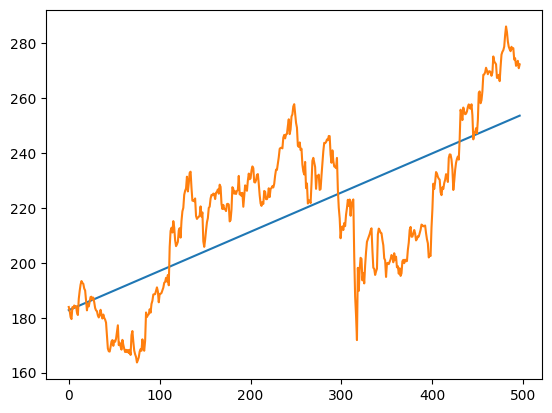

In [41]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [42]:
adf_test(prices_detrended)

ADF Statistics: -2.046313760263665
p-value: 0.26664233304668816
Critical Value (1%): -3.444
Critical Value (5%): -2.867
Critical Value (10%): -2.570


In [43]:
# Moving Average

In [44]:
window = 12 
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices, model = 'additive', period=30)# 30Days
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [46]:
adf_test(prices_adjusted)

ADF Statistics: -17.91188599496094
p-value: 2.9274892941436587e-30
Critical Value (1%): -3.444
Critical Value (5%): -2.868
Critical Value (10%): -2.570


# Time Series Forecasting Models

# AR Model

In [47]:
# making data stationary before model fitting
stock_data = yf.download('AAPL', start = '2023-01-01')

aaple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data = aaple_price_stationary[:30], aaple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


In [48]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Fit The AutoRegressive model into Training Data
model = AutoReg(train_data, lags = 5)
model_fit = model.fit()

# Make Predictions on the test Data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

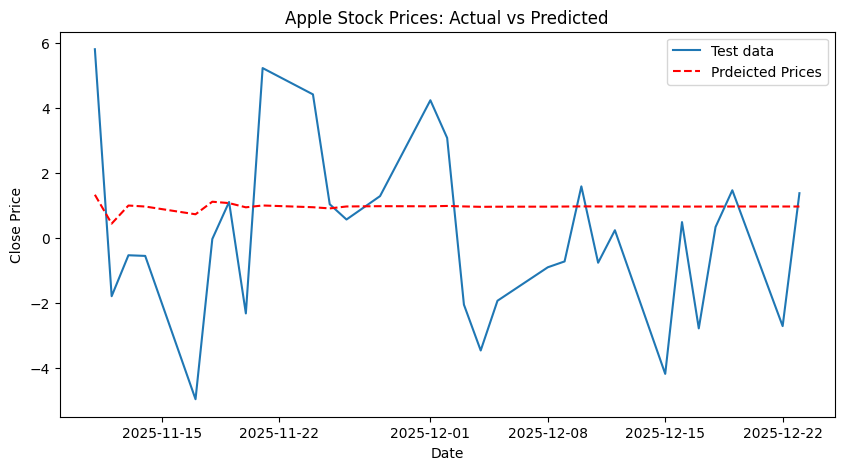

RMSE 2.72


In [50]:
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--' , label = 'Prdeicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE', rmse)

# MA Model

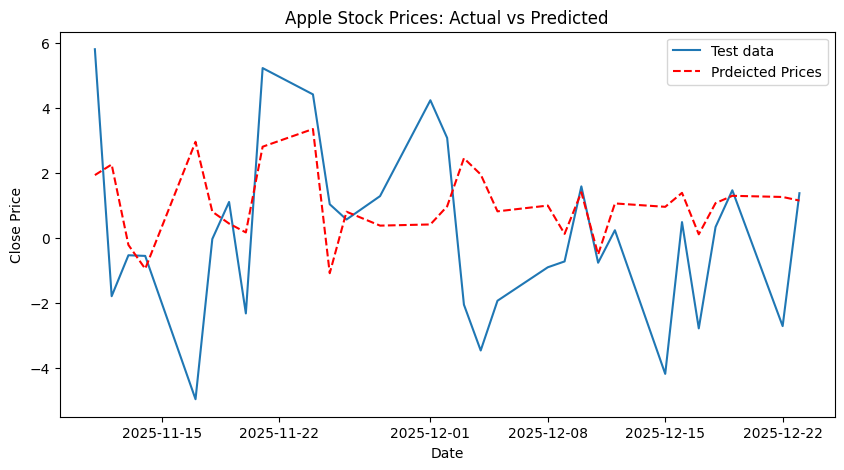

RMSE 2.87


In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Fit The Moving Average model into Training Data
model = ARIMA(train_data, order = (0,0,30))
model_fit = model.fit()

# Make Predictions on the test Data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--' , label = 'Prdeicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE', rmse)

# ARMA Model

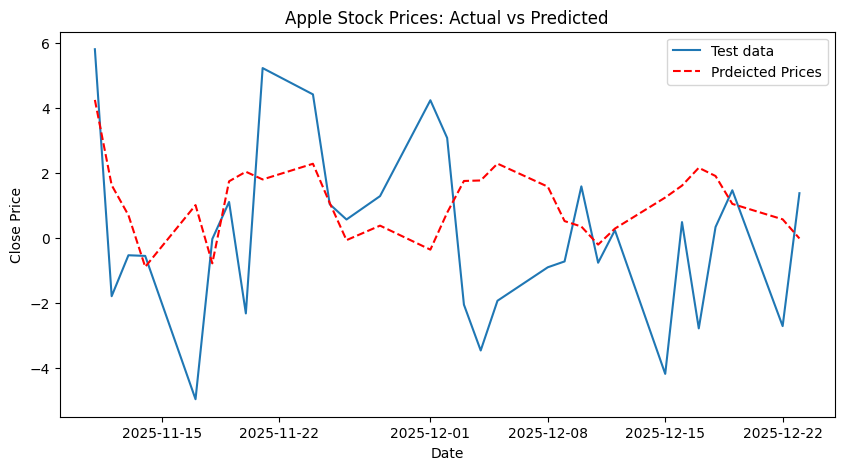

RMSE 2.92


In [52]:
model = ARIMA(train_data, order = (7,0,7))
model_fit = model.fit()

# Make Predictions on the test Data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--' , label = 'Prdeicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE', rmse)

# ARIMA MODEL

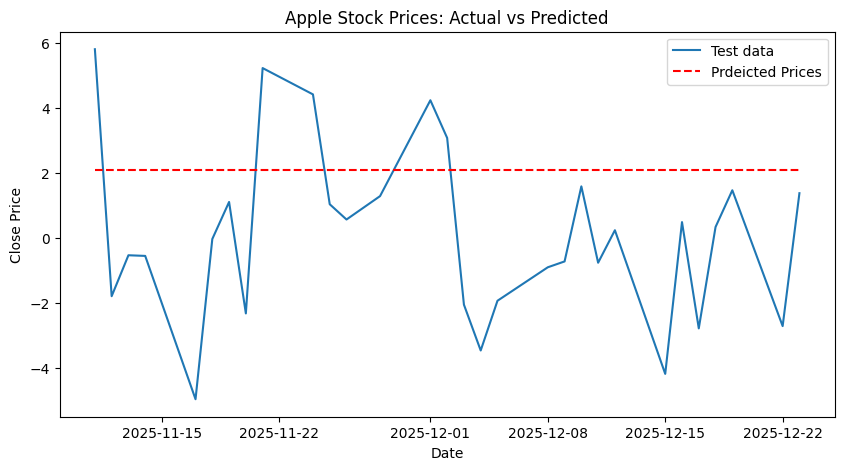

RMSE 3.31


In [53]:
model = ARIMA(train_data, order = (6,1,6))
model_fit = model.fit()

# Make Predictions on the test Data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--' , label = 'Prdeicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE', rmse)

# SARIMA Model

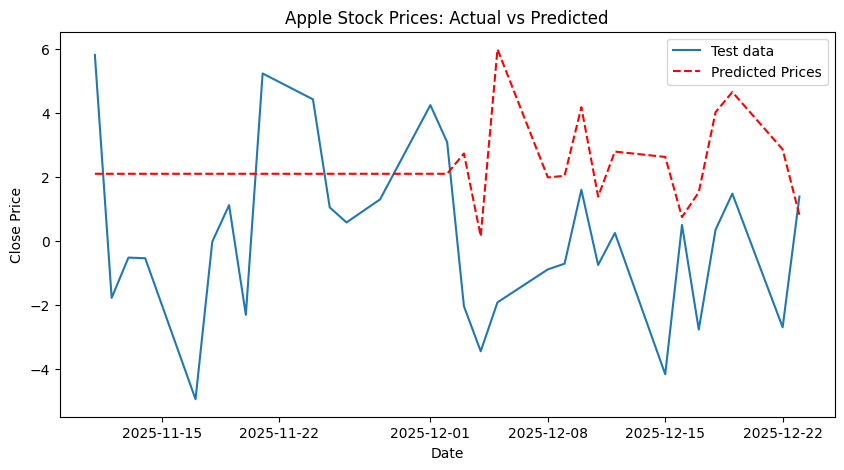

RMSE: 3.62


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 6,1,6
P,D,Q,s = 1,1,1,45

model = SARIMAX(train_data, order = (p,d,q), seasonal_order=(P,D,Q,s))
model_fit = model.fit()

# Make Predictions on the test Data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--' , label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

# Vector Models

In [55]:
tsla_data = yf.download('TSLA', start ='2023-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['AAPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace = True)

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(stock_data[['AAPL_Close', 'TSLA_Close']].dropna(), maxlag=[14])

[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=10.3243 , p=0.0000  , df_denom=703, df_num=14
ssr based chi2 test:   chi2=150.5024, p=0.0000  , df=14
likelihood ratio test: chi2=136.8701, p=0.0000  , df=14
parameter F test:         F=10.3243 , p=0.0000  , df_denom=703, df_num=14


{np.int64(14): ({'ssr_ftest': (np.float64(10.324278328203533),
    np.float64(2.1302360278923635e-21),
    np.float64(703.0),
    np.int64(14)),
   'ssr_chi2test': (np.float64(150.50242433489302),
    np.float64(5.703240044800414e-25),
    np.int64(14)),
   'lrtest': (np.float64(136.87010807769047),
    np.float64(2.9687747323959845e-22),
    np.int64(14)),
   'params_ftest': (np.float64(10.324278328203139),
    np.float64(2.130236027896753e-21),
    np.float64(703.0),
    14.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0.,

In [56]:
stock_data

Price,Close,High,Low,Open,Volume,TSLA_Close,AAPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600,113.639999,123.211205
2023-01-05,123.161957,125.871086,122.905826,125.240599,80962700,110.339996,124.482033
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,113.059998,123.161957
2023-01-09,128.215668,131.427226,127.959537,128.530919,70790800,119.769997,127.693581
2023-01-10,128.787079,129.309201,126.215868,128.324063,63896200,118.849998,128.215668
...,...,...,...,...,...,...,...
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700,467.260010,274.609985
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700,483.369995,271.839996


In [57]:
tsla_data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000
...,...,...,...,...,...
2025-12-17,467.260010,495.279999,466.200012,488.220001,106490400
2025-12-18,483.369995,490.859985,473.119995,478.160004,95168400


In [58]:
data = stock_data[['AAPL_Close', 'TSLA_Close']].diff().dropna()
train_data, test_data = data[:14], data[-14:]

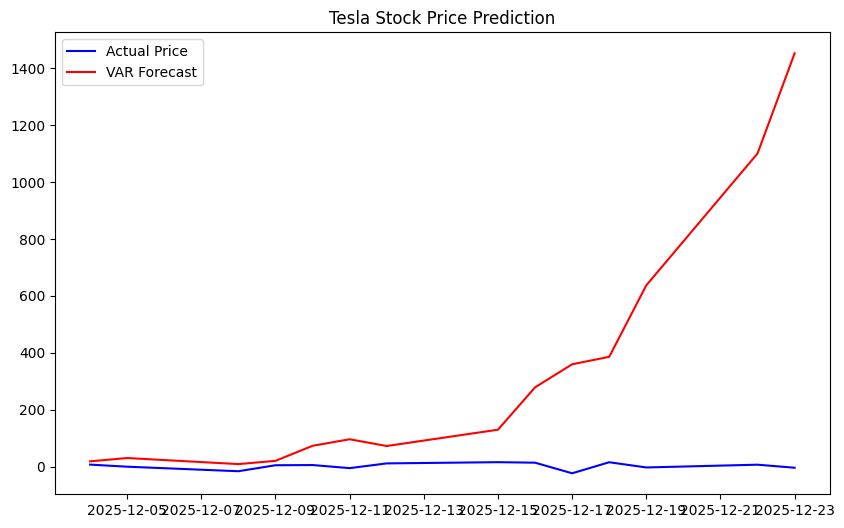

RMSE: 541.62


In [59]:
from statsmodels.tsa.api import VAR, VARMAX
import pandas as pd
#VAR
model = VAR(train_data)
result = model.fit(maxlags = 7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps = len(test_data))

predictions = pd.DataFrame(predictions, index = test_data.index, columns = test_data.columns)

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color = 'blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VAR Forecast', color = 'Red')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE:', rmse)

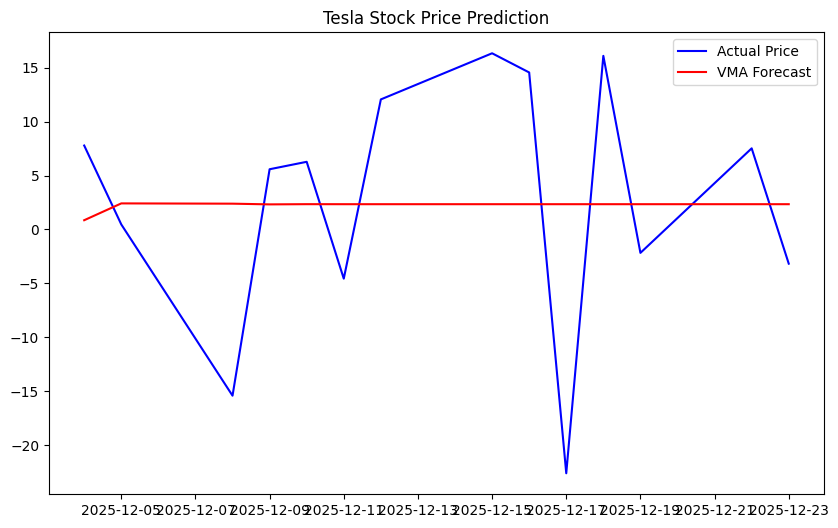

RMSE: 11.26


In [60]:
# VMA
model = VARMAX(train_data, order = (1,1))
result = model.fit()
predictions = result.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)
plt.figure(figsize = (10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price' , color = 'blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VMA Forecast' , color = 'red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

#evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE:', rmse)

# Smoothing Methods

# Moving Average

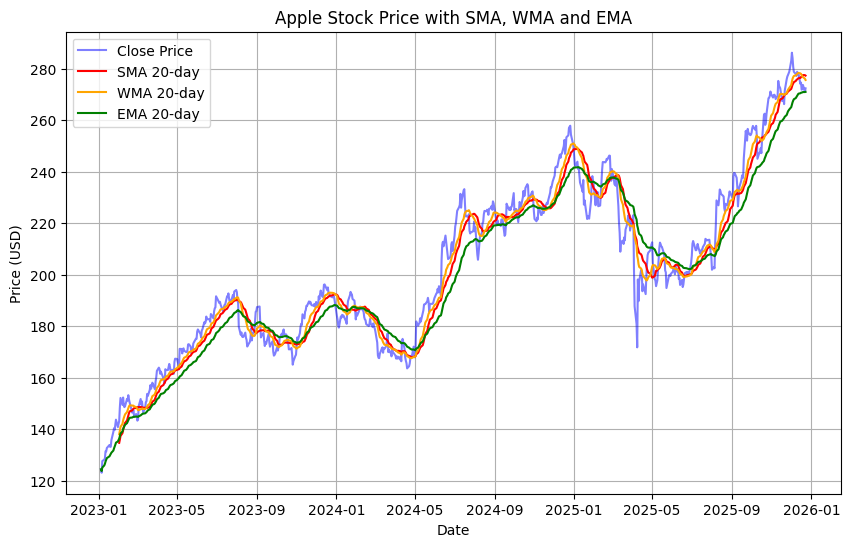

In [61]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window = window_size).mean()

#Calculate Weighted Moving Average(WMA)
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights)/ weights.sum(), raw=True)

#Calculate Exponential Moving Average(EMA)
stock_data['EMA'] = stock_data['Close'].ewm(window_size).mean()

#Plotting
plt.figure(figsize = (10,6))
plt.plot(stock_data['Close'], label = 'Close Price' , color = 'blue', alpha = 0.5)
plt.plot(stock_data['SMA'], label = f'SMA {window_size}-day' , color = 'red')
plt.plot(stock_data['WMA'], label = f'WMA {window_size}-day' , color = 'orange')
plt.plot(stock_data['EMA'], label = f'EMA {window_size}-day' , color = 'green')
plt.legend()
plt.title('Apple Stock Price with SMA, WMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()


# Maodel Evaluation Metrics

In [62]:
# making data stationary before model fitting
stock_data = yf.download('AAPL', start = '2023-01-01')

aaple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
# train_data: first 30 observations
# test_data: last 30 observations
# Number of observations ≥ 5 × lags
train_data, test_data = aaple_price_stationary[:30], aaple_price_stationary[-30:]
#Number of observations must be significantly larger than the number of lags
model = AutoReg(train_data, lags= 10)
model_fit = model.fit()

predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic= False
)

[*********************100%***********************]  1 of 1 completed


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 1. MAE
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE) : {mae}')

# 2. MSE
mse = mean_squared_error(test_data , predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE) : {rmse}')

# 4. Mean Absolute Percentage Error(MAPE)
mape = np.mean(
    2 * np.abs(predictions - test_data) /
    (np.abs(test_data) + np.abs(predictions))
) * 100
print(f'Mean Absolute Percentage Error (MAPE) : {mape}%')

# 5. aic znd bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC) : {aic}')
print(f'Bayesian Information Criterion (BIC) : {bic}')

Mean Absolute Error (MAE) : 7.370452196417579
Mean Squared Error (MSE): 91.52138012886445
Root Mean Squared Error (RMSE) : 9.566680726817658
Mean Absolute Percentage Error (MAPE) : nan%
Akaike Information Criterion (AIC) : 103.20703600881828
Bayesian Information Criterion (BIC) : 115.15582329146616


# Handling Missing Values

In [64]:
data = {
    'Date' : ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10' , '2024-01-12'],
    'Price'  : [100, 101, 103, 106, 107, 108, 109, 111]
}
# Create  A DataFrame
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace= True)

In [65]:
# Create a complete date range
complete_index = pd.date_range(start = '2024-01-01', end = '2024-01-12' , freq = 'D')

# Reindex the DataFrame
data = data.reindex(complete_index)
print("Reindexed DataFrame with Missing Dates:\n" , data)

Reindexed DataFrame with Missing Dates:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0


# 1. Imputation

In [66]:
# Mean Imputation
mean_value = data.mean()
data_mean_imputed = data.fillna(mean_value)

# Median Imputation
median_value = data.median()
data_median_imputed = data.fillna(median_value)

# Median Imputation
mode_value = data.mode()
data_mode_imputed = data.fillna(mode_value.values[0][0])

# Forward Fill
data_ffill = data.ffill()

# Backward Fill
data_bfill = data.bfill()



In [67]:
data

,Price
2024-01-01,100.0
2024-01-02,101.0
2024-01-03,NaN
2024-01-04,103.0
2024-01-05,NaN
2024-01-06,NaN
2024-01-07,106.0
2024-01-08,107.0
2024-01-09,108.0
2024-01-10,109.0


In [68]:
print("Mean:", mean_value.values[0])
print("Mean Imputation", data_mean_imputed)

Mean: 105.625
Mean Imputation               Price
2024-01-01  100.000
2024-01-02  101.000
2024-01-03  105.625
2024-01-04  103.000
2024-01-05  105.625
2024-01-06  105.625
2024-01-07  106.000
2024-01-08  107.000
2024-01-09  108.000
2024-01-10  109.000
2024-01-11  105.625
2024-01-12  111.000


In [69]:
print("Median:", median_value.values[0])
print("Mean Imputation", data_median_imputed)

Median: 106.5
Mean Imputation             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  106.5
2024-01-04  103.0
2024-01-05  106.5
2024-01-06  106.5
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  106.5
2024-01-12  111.0


In [70]:
print("Mode:", mode_value.values[0][0])
print("Mode Imputation", data_mode_imputed)

Mode: 100.0
Mode Imputation             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  100.0
2024-01-04  103.0
2024-01-05  100.0
2024-01-06  100.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  100.0
2024-01-12  111.0


In [71]:
print("Forward Fill:", data_ffill)
print("Backward Fill", data_bfill)

Forward Fill:             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  101.0
2024-01-04  103.0
2024-01-05  103.0
2024-01-06  103.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  109.0
2024-01-12  111.0
Backward Fill             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  103.0
2024-01-04  103.0
2024-01-05  106.0
2024-01-06  106.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  111.0
2024-01-12  111.0


# 2. Interpolation

In [72]:
# Linear Interpolation
data_linear_interp = data.interpolate(method = 'linear')

# Polynomial Interpolation(degree = 2)
data_poly_interp = data.interpolate(method ='polynomial', order = 2)

# Spline Interpolation
data_spline_interp = data.interpolate(method ='spline', order = 2)

print("Linear Interpolation:", data_linear_interp)
print("Polynomial Interpolation:", data_poly_interp)
print("Linear Interpolation:", data_spline_interp)

Linear Interpolation:             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0
Polynomial Interpolation:             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0
Linear Interpolation:             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0


# 3. Predictive Modelling

In [73]:
data['Sales'] = [700,900,1000,2000,1500,3000,2300,4000,5900,6000,6500,7000]
data

,Price,Sales
2024-01-01,100.0,700
2024-01-02,101.0,900
2024-01-03,NaN,1000
2024-01-04,103.0,2000
2024-01-05,NaN,1500
2024-01-06,NaN,3000
2024-01-07,106.0,2300
2024-01-08,107.0,4000
2024-01-09,108.0,5900
2024-01-10,109.0,6000


In [74]:
from sklearn.linear_model import LinearRegression

known_data = data.dropna(subset = ['Price'])
missing_data = data[data['Price'].isna()]

# Train a model on known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price'])

# Predict Missing Values
predicted_values = model.predict(missing_data[['Sales']])
data.loc[data['Price'].isna(), 'Price'] = predicted_values

print("\nData with Predicted", data)


Data with Predicted                  Price  Sales
2024-01-01  100.000000    700
2024-01-02  101.000000    900
2024-01-03  101.675094   1000
2024-01-04  103.000000   2000
2024-01-05  102.434691   1500
2024-01-06  104.713483   3000
2024-01-07  106.000000   2300
2024-01-08  107.000000   4000
2024-01-09  108.000000   5900
2024-01-10  109.000000   6000
2024-01-11  110.030665   6500
2024-01-12  111.000000   7000


In [75]:
missing_data[['Sales']].isna().sum()

Sales    0
dtype: int64